# Example script: load LE data and do some simple nino3.4 analysis

This is a basic script that loads output from a large ensemble, does some simple processing, and plots the result.

Make sure that preprocessing with bash/cdo script has been run. (process_nino34.sh)


**Please use the *Pangeo (2019.09.12 - py3.7)* environment.** The standard Python 3 environment does not provide all necessary packages. Of course you can also use your own custom environment. See github page for suggestions.

Notes:
- DJF seasonal means have equal weights for each month, not weighted by days in month
- first value is 1850 D and JF 1851, last value should be discarded because it only contains Dec 2100

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py (only works with custom environment)
# import cdo
# cdo = cdo.Cdo() #


    


## set paths

In [2]:
# directories with processed output
basedir_processed_MMLEA = '/glade/scratch/milinski/SMILEs/'

# directory for saving plots
plotdir = './plots/test/nino34/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## load CESM-LENS

In [47]:
var = 'nino34_ts'
model = 'cesm-lens'
filepath = basedir_processed_MMLEA + 'CESM-LENS/nino34/'

file_prefix=var+'_'+model+'_'
file_suffix='_1920-2100_DJFmean.nc'

# initialise array:
ds = []

for member in tqdm(range(1,41)):
    if member==1:
        file = var + '_cesm-lens_historical_rcp85_r1i1p1_1850-2100_DJFmean.nc'
    else:
        id = 'r'+str(member)+'i1p1'
        file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


cesm_nino34 = xr.concat(ds, dim='ensemble')
cesm_nino34['ts'] = cesm_nino34['ts']-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 40/40 [00:00<00:00, 63.14it/s]


In [48]:
cesm_nino34

<xarray.Dataset>
Dimensions:    (time: 251, ensemble: 40, bnds: 2)
Coordinates:
  * time       (time) object 1851-01-16 12:00:00 ... 2100-12-16 12:00:00
    lon        float64 0.0
    lat        float64 0.0
Dimensions without coordinates: ensemble, bnds
Data variables:
    time_bnds  (ensemble, time, bnds) object 1850-12-01 00:00:00 ... 2101-01-...
    ts         (ensemble, time) float32 26.43 26.67 26.17 ... 31.66 28.2 nan
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Sat Aug 07 20:38:35 2021: cdo timselmean,3,2 -select,season...
    NCO:          "4.5.2"
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

## plots

In [54]:
# define new time axis for plotting because matplotlib doesn't work with the cftime._cftime.DatetimeNoLeap format

cesm_time = cesm_nino34.indexes['time'].to_datetimeindex()

/glade/work/milinski/conda/conda-envs/jlab_37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  This is separate from the ipykernel package so we can avoid doing imports until


## one member

(-43829.0, 47482.0)

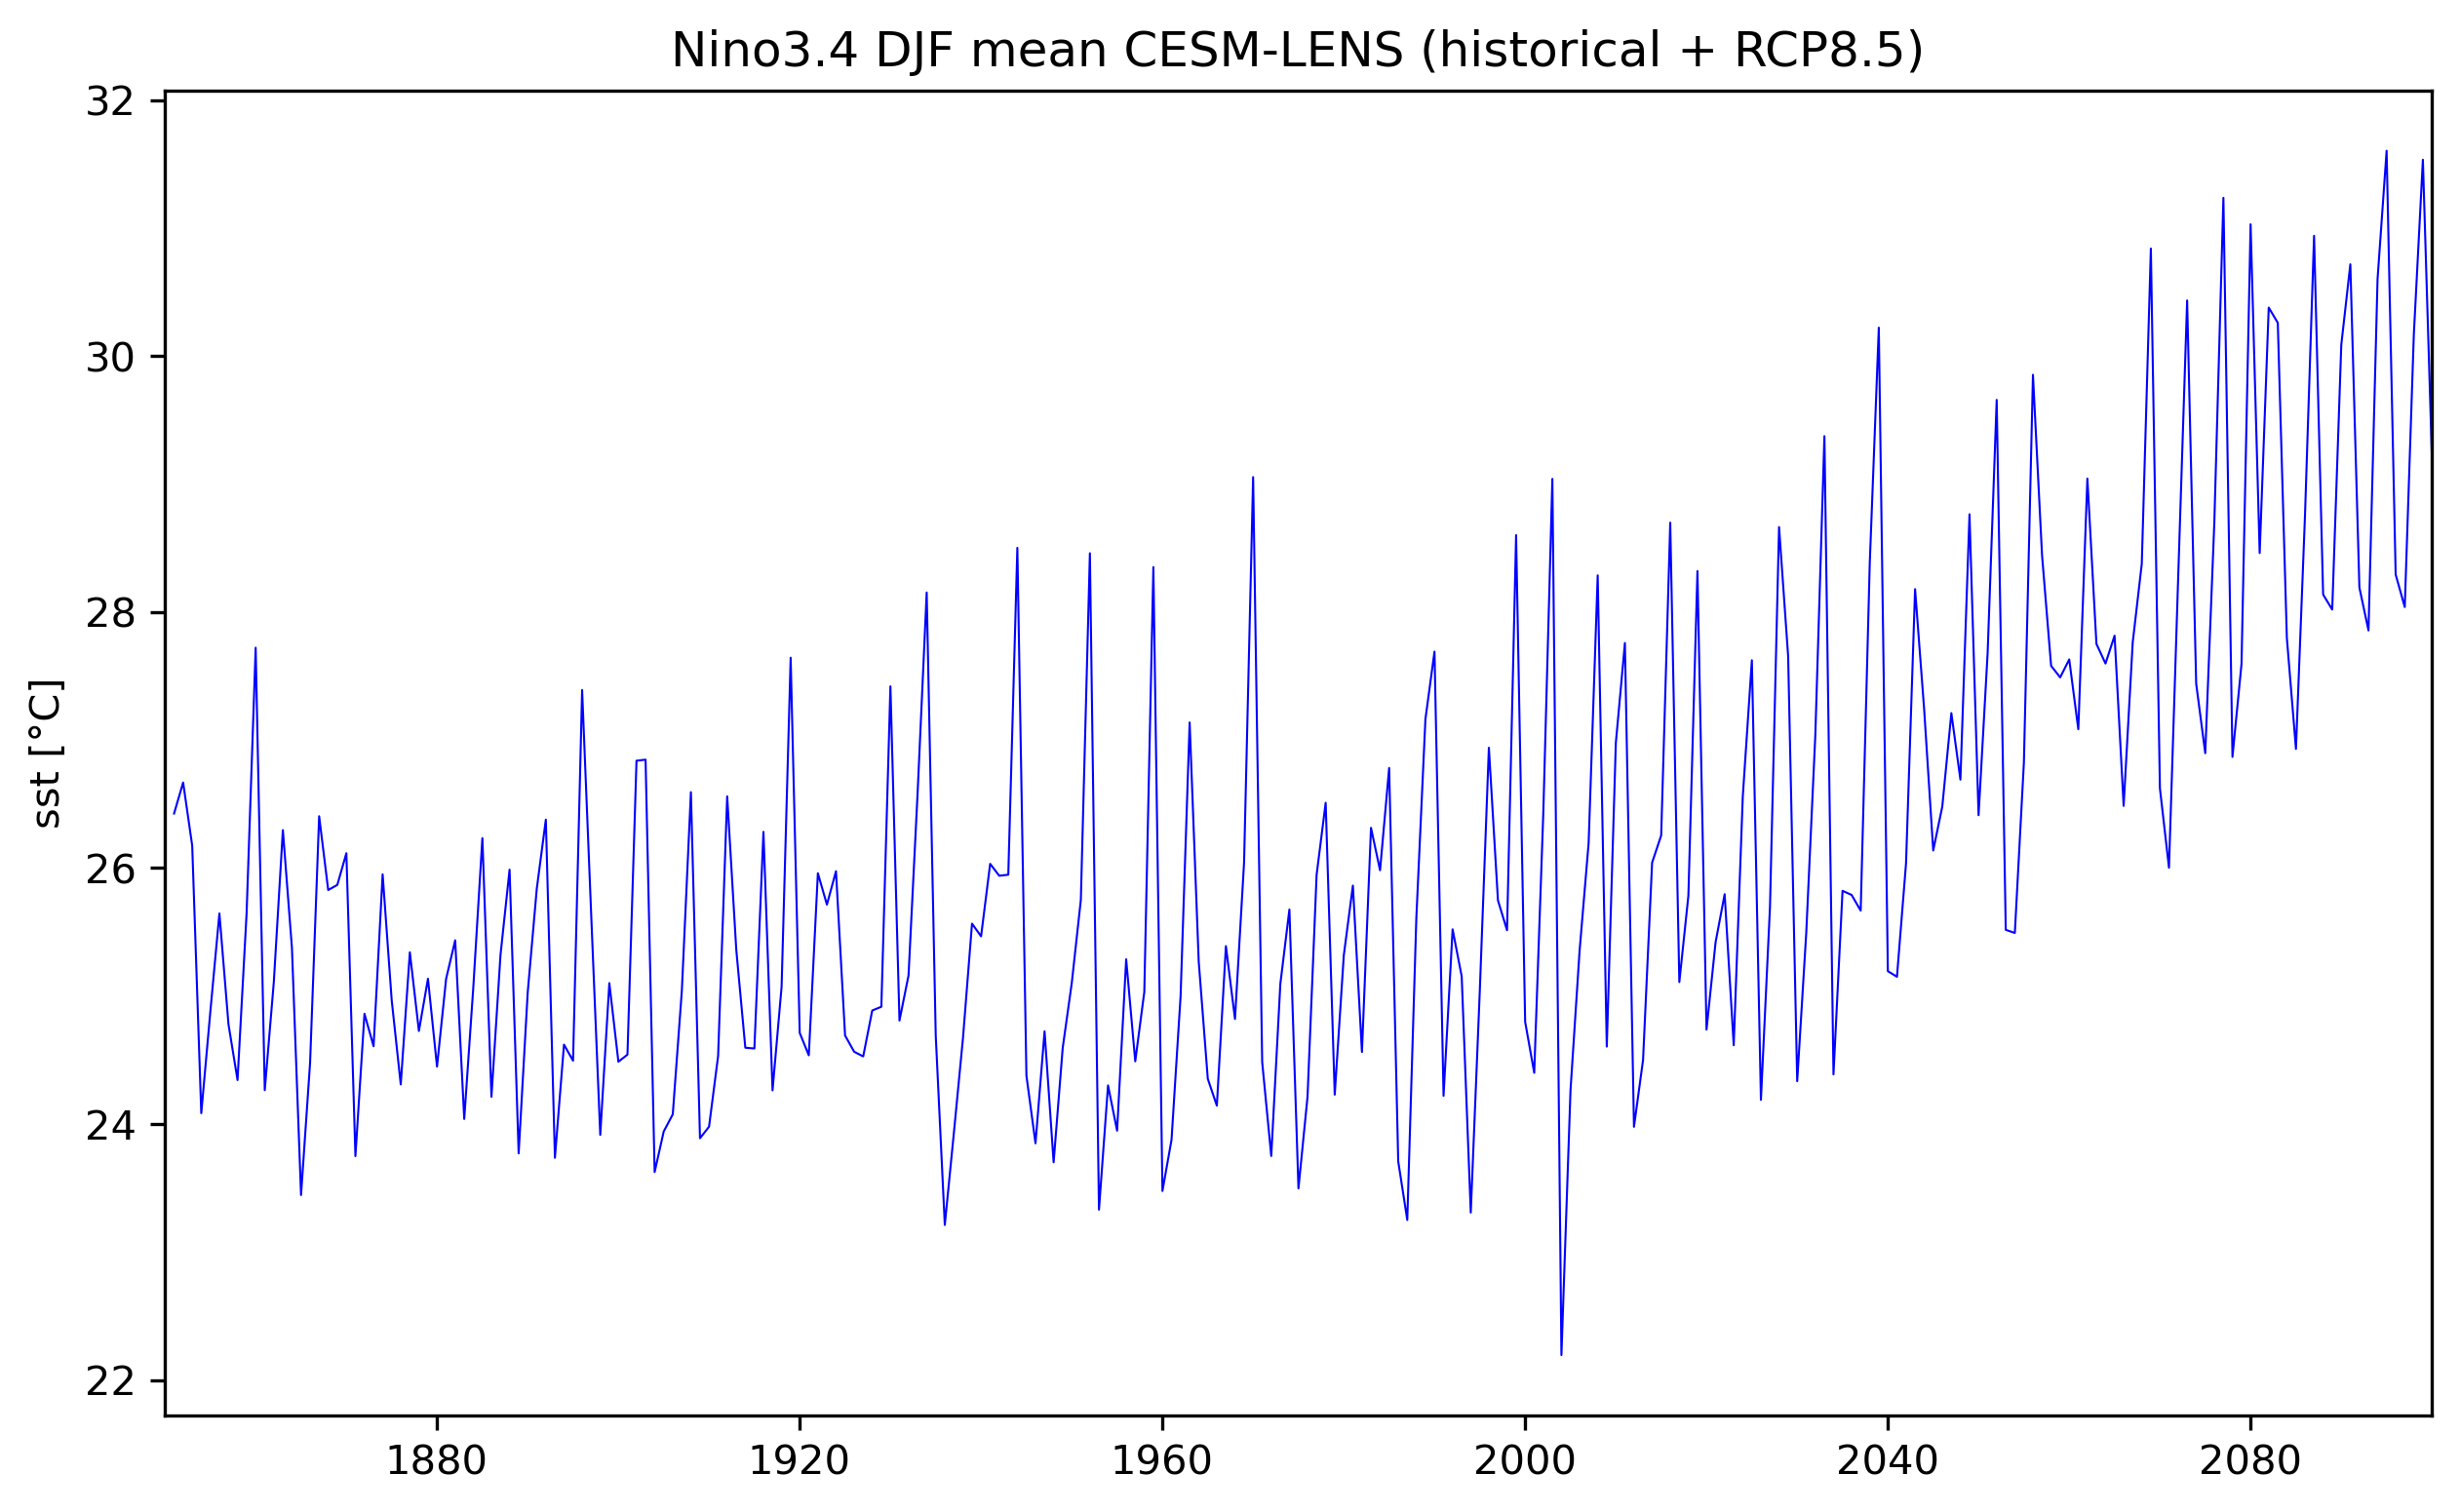

In [59]:
plt.figure(figsize=(10, 6), dpi=300)

# member 1
plt.plot(cesm_time,cesm_nino34['ts'][0,:],color='blue',linewidth=0.5);
# plt.plot(cesm_GSAT_ym_anom['year'],cesm_GSAT_ym_anom['tas'].mean(dim='ensemble'),color='blue',linewidth=1);


plt.title('Nino3.4 DJF mean CESM-LENS (historical + RCP8.5)')

plt.ylabel('sst [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

# plt.savefig(plotdir+'nino34_cesm.pdf', bbox_inches='tight', dpi=300)

## ensemble standard deviation

/glade/work/milinski/conda/conda-envs/jlab_37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


(-17897.0, 47482.0)

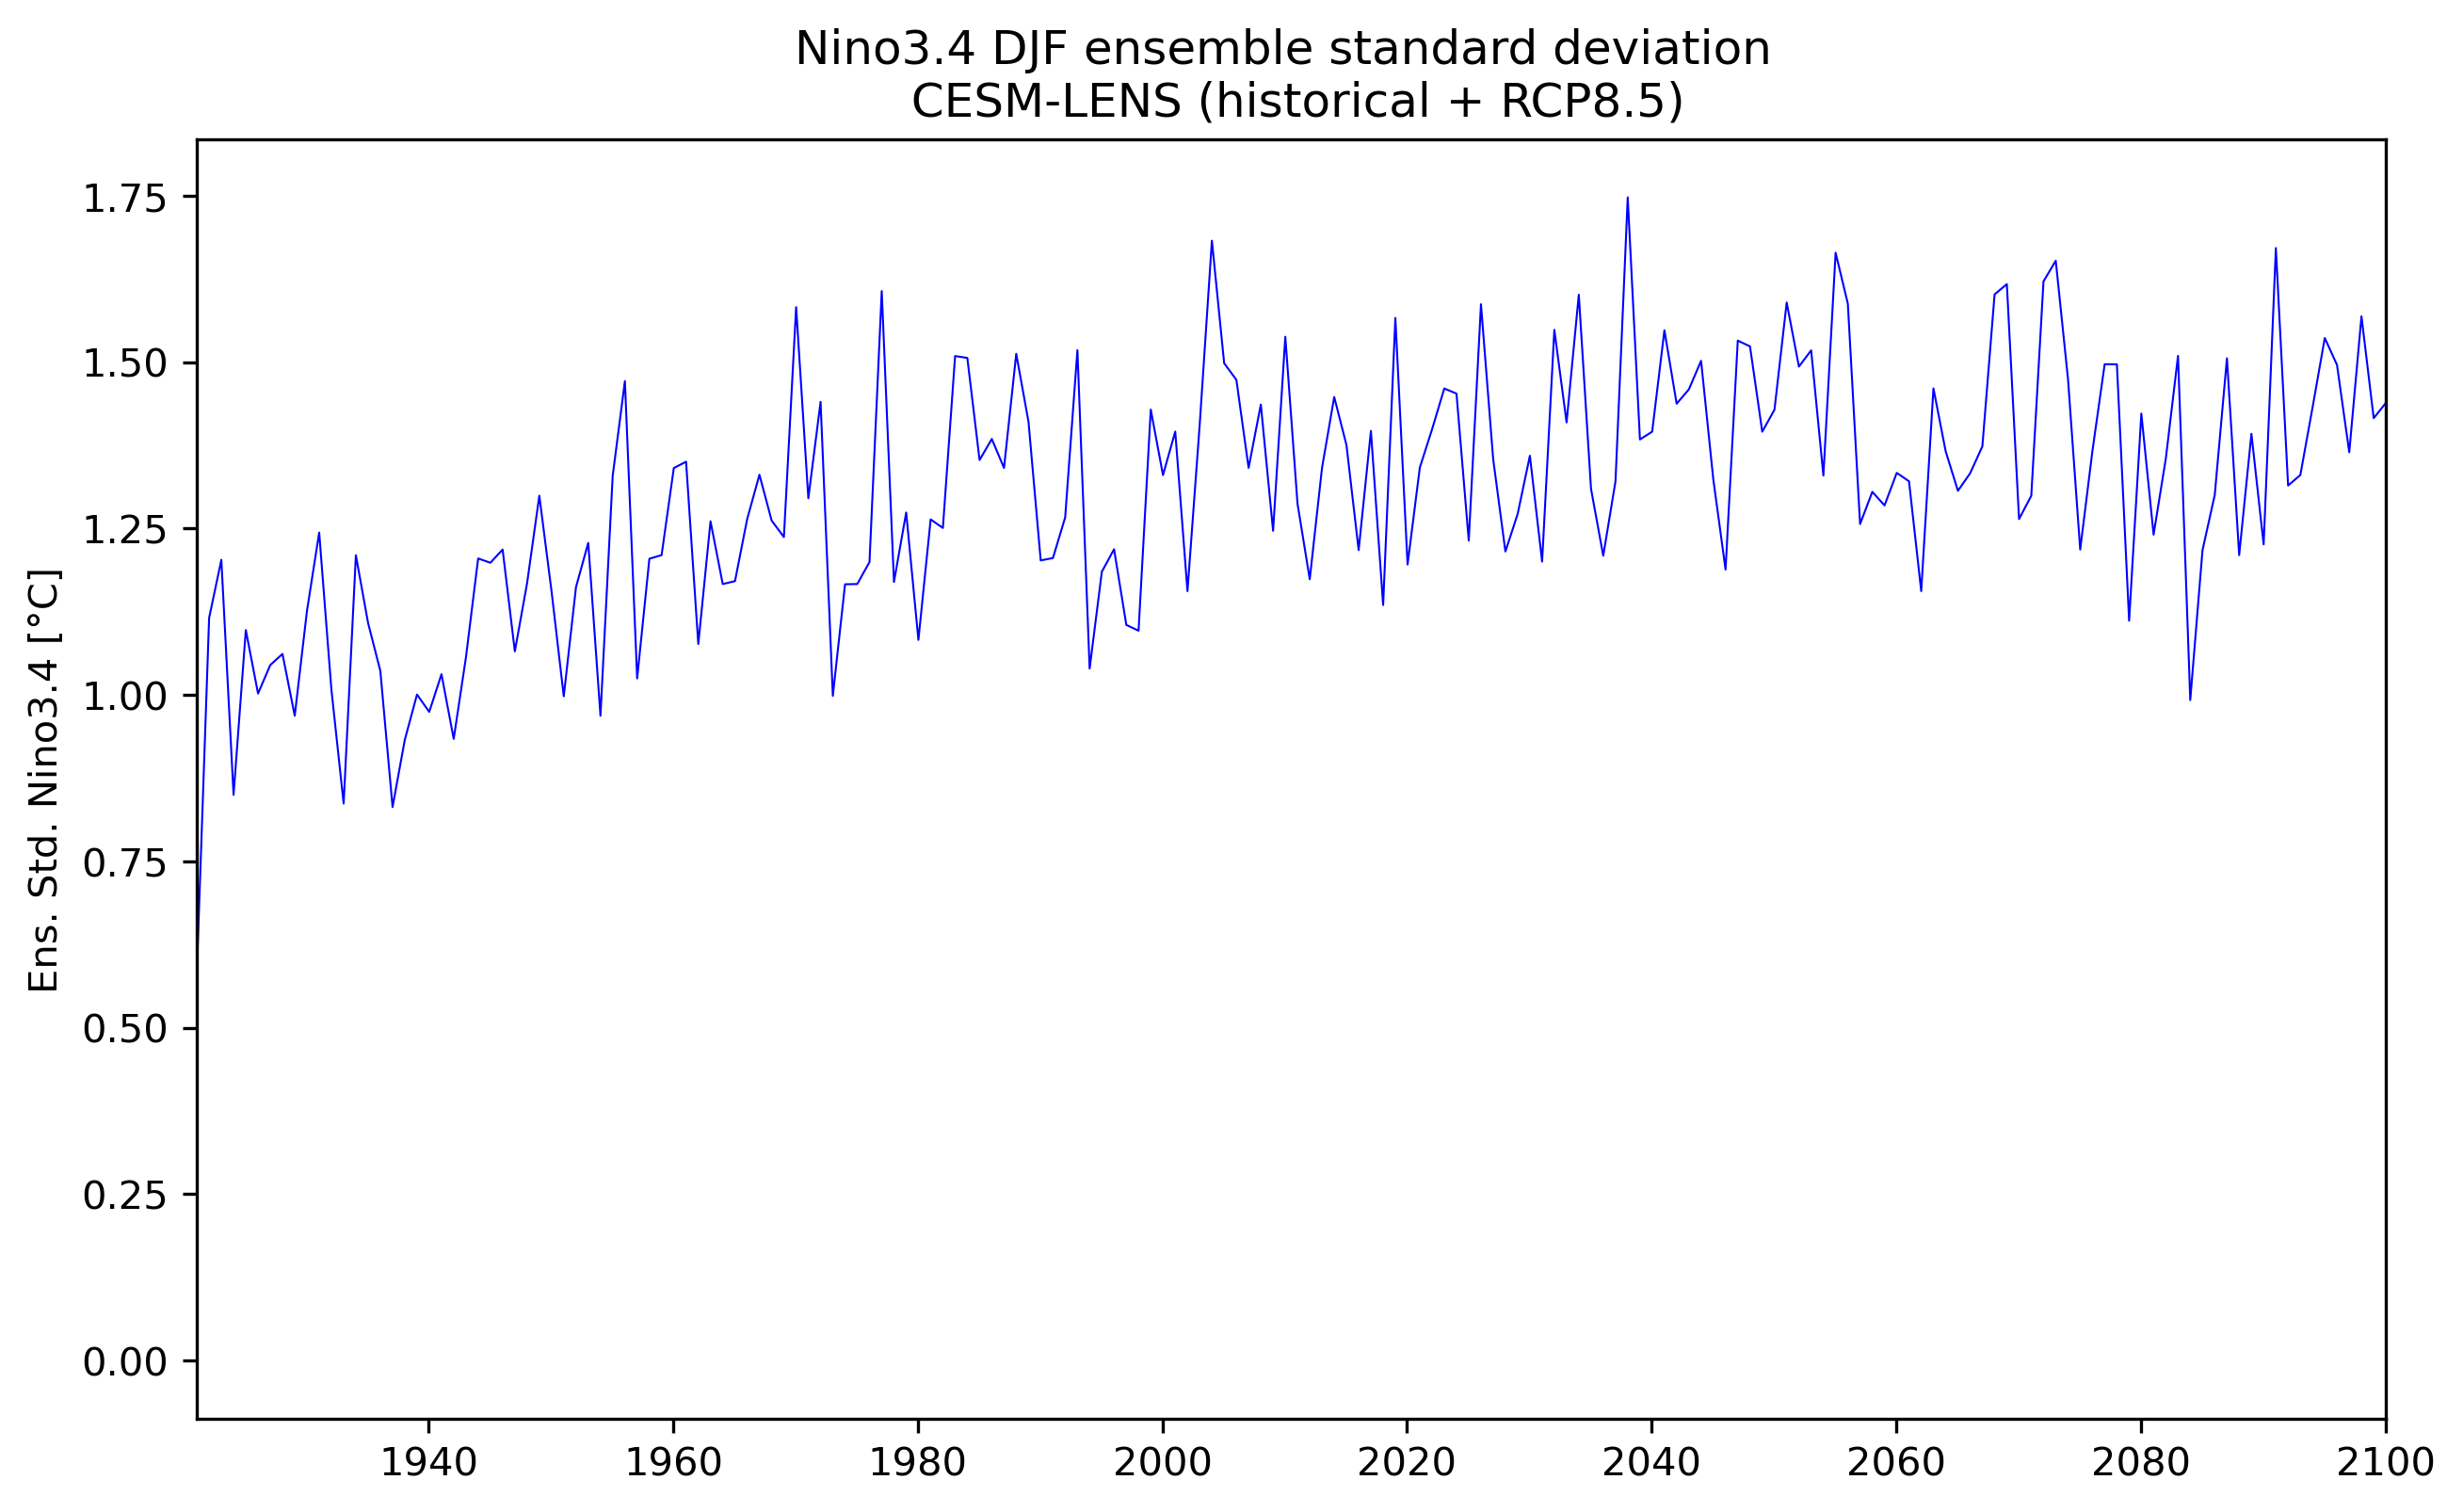

In [67]:
plt.figure(figsize=(10, 6), dpi=300)

# member 1
plt.plot(cesm_time,cesm_nino34['ts'].std(dim='ensemble'),color='blue',linewidth=0.5);
# plt.plot(cesm_GSAT_ym_anom['year'],cesm_GSAT_ym_anom['tas'].mean(dim='ensemble'),color='blue',linewidth=1);


plt.title('Nino3.4 DJF ensemble standard deviation \n CESM-LENS (historical + RCP8.5)')

plt.ylabel('Ens. Std. Nino3.4 [°C]')
plt.xlim([pd.Timestamp('1921-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

# plt.savefig(plotdir+'nino34_cesm.pdf', bbox_inches='tight', dpi=300)